In [1]:
#!/user/bin/env python
# -*- coding:utf-8 -*-
# author: Wei Li
# creat: 2022-3-29
# modify: 2022-3-29
# function: Implement the least square method and gradient descent method 
# for solving the linear regression problem


import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import cholesky


In [45]:
# generate 10 samples 
N  = 10
X_range = (-5,5)
mu = 0
sigma = 0.2

def f(x):
    return np.sin(x/5)+np.cos(x)

def Generate_Samples(N,X_range,mu,sigma):
    '''
        Generate the samples with the function f(x) and error epsilons
        @param: N the, samples numbers 
                X_range, the value range of x_i
                mu, the mean of the error normal distribution
                sigma, the standard deviation of the error normal distribution
        @return: samples, the generated samples. 
    '''
    epsilons = np.random.normal(mu,sigma,N)
    X = np.random.uniform(X_range[0],X_range[1],N)
    samples = []
    for x_i, epsilon in zip(X,epsilons):
        samples.append((x_i,f(x_i)+epsilon))
    return samples

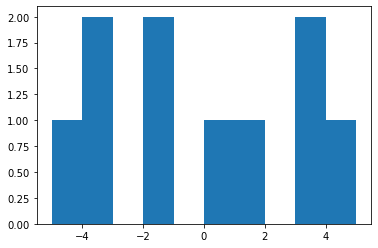

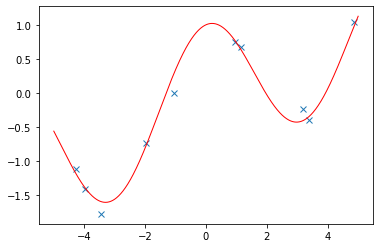

Samples:  [(-3.4492531309271857, -1.7700860921019381), (-3.9877355655210476, -1.3985741081989016), (-4.26199697033981, -1.11736862858175), (-1.9733902943309047, -0.7286393381233645), (3.3736091612523023, -0.3920171767436664), (3.1891077453774805, -0.2313057102243238), (-1.0664741436131298, 0.006931761243736068), (1.165059616936932, 0.6768179274037461), (0.965316161021458, 0.7468163757854606), (4.866903318887548, 1.045756102645296)]


In [46]:
# generate N samples with the functions above
samples = Generate_Samples(N,X_range,mu,sigma)
samples = sorted(samples,key=lambda samples:samples[1])

# Plot the uniform distribution of 'x_i's
plt.hist([s[0] for s in samples],[x for x in range(-5,6)])
plt.show()

# plot sample dispersion and the curve of y_i = f(x_i)
plt.plot([s[0] for s in samples],[s[1] for s in samples],'x')
x = np.linspace(-5,5,1000)
plt.plot(x,f(x),color='red',linewidth=1)
plt.show()

# display the generated samples
print("Samples: ",samples)